# Churn Modelling data Preprocessing

### Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./Churn_Modelling.csv", sep=',')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Initial checking of the data

In [4]:
data.shape

(10000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There is no null values in the data

### Identify the target column

Here **Exited** column is the target column. 

### Determining the predictors and Preprocess

Predictors are nothing but explanatory variables which will be used to predict the class label of a particular instance.

In [6]:
data['RowNumber'].nunique()

10000

**RowNumber:** It is just numbering of rows and has no significance in determining which instance will belong to wich class. Hence RowNumber is not a predictor.

In [7]:
data['CustomerId'].nunique()

10000

**CustomerID:** Like RowNumber, CustomerID is also different for different instances. Hence, we can't use CustomerID as our predictor.

In [8]:
data['Surname'].nunique()

2932

**Surname:** For our usecase Surname will have little to no significance in determining the churn/attrition of the person from the company. So Surname is also not an useful predictor.

**CreditScore**

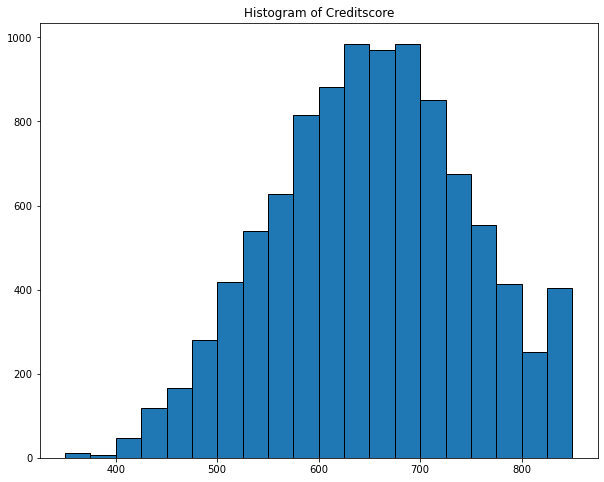

In [9]:
plt.figure(figsize=(10,8))
plt.hist(data['CreditScore'].values, bins=20, edgecolor='k')
plt.title("Histogram of Creditscore")
plt.show()

So we will use "CreditScore" as a predictor. But before that we need to scale it.

**Scaling the CreditScore data:**

In [10]:
def min_max_scaling(values):
    minimum = values.min()
    maximum = values.max()
    return ((values - minimum)/(maximum - minimum))

In [11]:
data['CreditScoreScaled'] = min_max_scaling(data['CreditScore'])

In [12]:
feature_list = ['CreditScoreScaled']

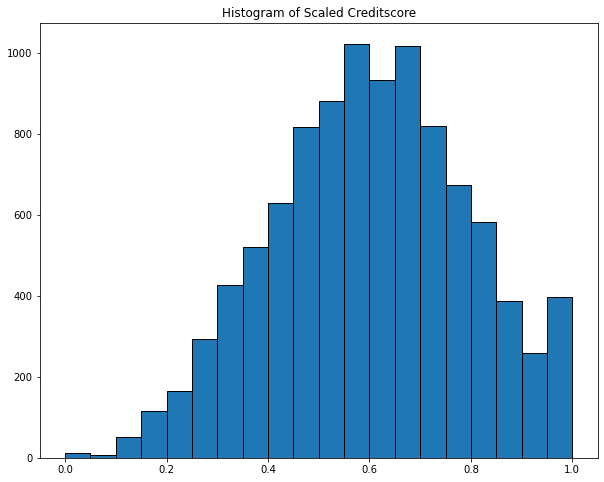

In [13]:
plt.figure(figsize=(10,8))
plt.hist(data['CreditScoreScaled'].values, bins=20, edgecolor='k')
plt.title("Histogram of Scaled Creditscore")
plt.show()

**Geography**

In [14]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
pd.crosstab(index=data['Geography'], columns=data['Exited'], normalize='index')

Exited,0,1
Geography,,
France,0.838452,0.161548
Germany,0.675568,0.324432
Spain,0.833266,0.166734


We need to consider "Geography" as a predictor. But as Geography is a categorical variable we need to convert it into suitable format. We will one-hot-encode them

In [16]:
geography_encoded = pd.get_dummies(data['Geography'], drop_first=True)

In [17]:
data = pd.concat([data, geography_encoded], axis=1)

In [18]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreScaled,Germany,Spain
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.538,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.516,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.304,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.698,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.000,0,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,0.590,0,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0.944,0,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0.052,1,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0.302,0,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0.668,0,0


In [19]:
feature_list += ['Germany', 'Spain']

**Gender**

In [20]:
pd.crosstab(index=data['Gender'], columns=data['Exited'], normalize='index')

Exited,0,1
Gender,,
Female,0.749285,0.250715
Male,0.835441,0.164559


Gender can also play a vital role in classification. We should consider gender as predictor, but we need to encode it first.

In [21]:
data['GenderCoded'] = [1 if x == 'Male' else 0 for x in data['Gender']]

In [22]:
feature_list += ['GenderCoded']

**Age**

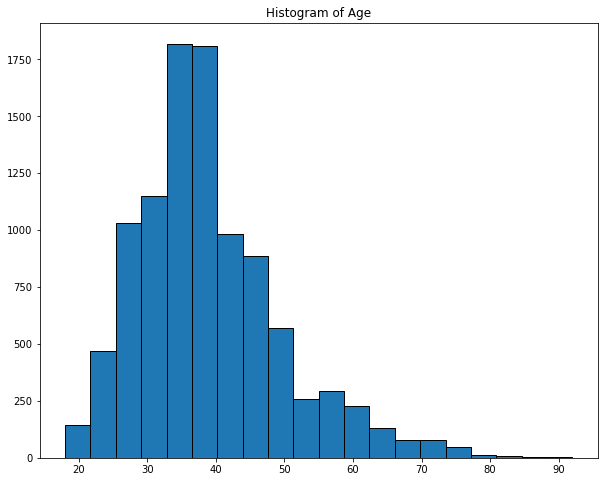

In [23]:
plt.figure(figsize=(10,8))
plt.hist(data['Age'],bins=20, edgecolor='k')
plt.title("Histogram of Age")
plt.show()

We shall consider "Age" as our predictor. But before that we need to scale it.

In [24]:
data['AgeScaled'] = min_max_scaling(data['Age'])

In [25]:
feature_list += ['AgeScaled']

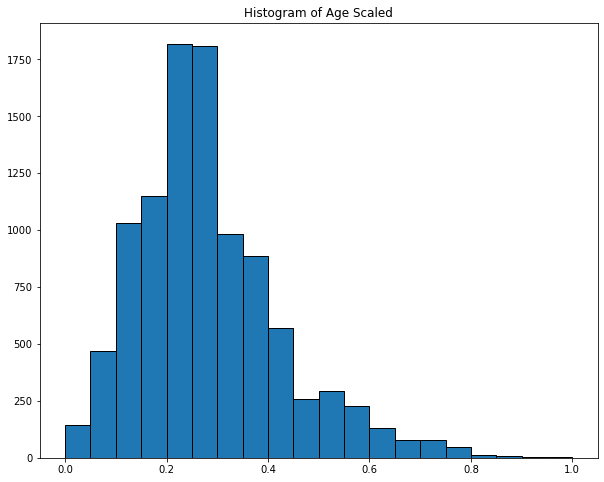

In [26]:
plt.figure(figsize=(10,8))
plt.hist(data['AgeScaled'],bins=20, edgecolor='k')
plt.title("Histogram of Age Scaled")
plt.show()

**Tenure**

In [27]:
data['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

We will use Tenure as our predictor without any further modification.

In [28]:
feature_list += ['Tenure']

**Balance**

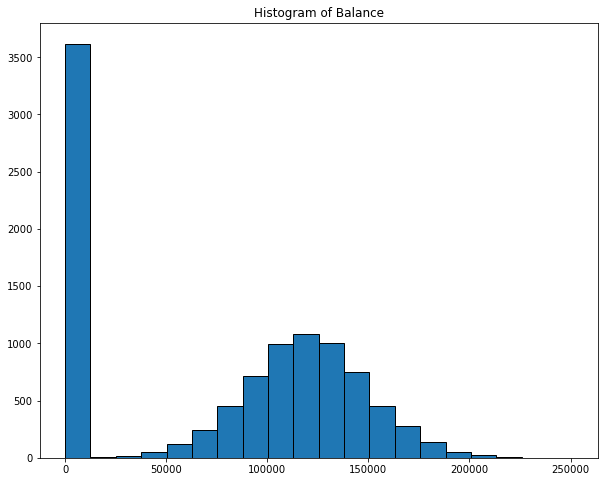

In [29]:
plt.figure(figsize=(10,8))
plt.hist(data['Balance'],bins=20, edgecolor='k')
plt.title("Histogram of Balance")
plt.show()

In [30]:
data['BalanceScaled'] = min_max_scaling(data['Balance'])

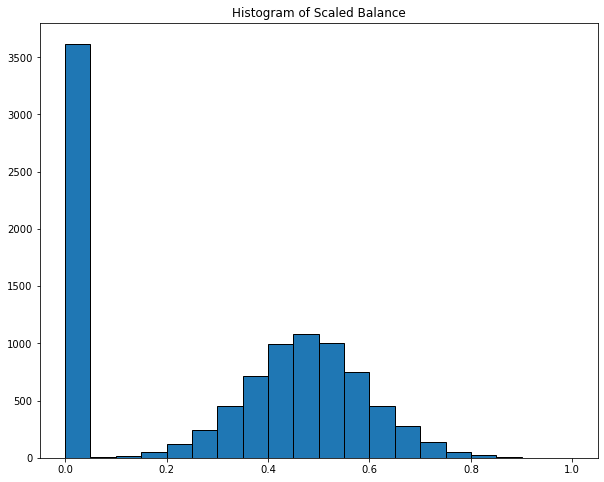

In [31]:
plt.figure(figsize=(10,8))
plt.hist(data['BalanceScaled'],bins=20, edgecolor='k')
plt.title("Histogram of Scaled Balance")
plt.show()

In [32]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'CreditScoreScaled',
       'Germany', 'Spain', 'GenderCoded', 'AgeScaled', 'BalanceScaled'],
      dtype='object')

In [33]:
feature_list += ['BalanceScaled', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

**EstimatedSalary**

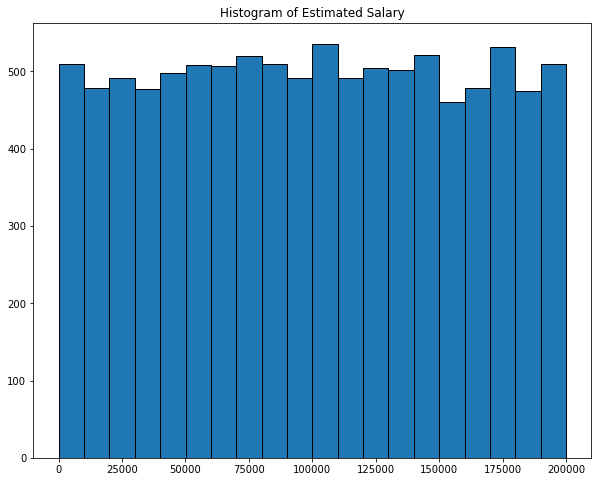

In [34]:
plt.figure(figsize=(10,8))
plt.hist(data['EstimatedSalary'],bins=20, edgecolor='k')
plt.title("Histogram of Estimated Salary")
plt.show()

In [35]:
data['EstimatedSalaryScaled'] = min_max_scaling(data['EstimatedSalary'])

In [36]:
feature_list += ['EstimatedSalaryScaled']

**The final feature list**

In [37]:
feature_list

['CreditScoreScaled',
 'Germany',
 'Spain',
 'GenderCoded',
 'AgeScaled',
 'Tenure',
 'BalanceScaled',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalaryScaled']

### Save the preprocessed data along with target

In [38]:
processed_data = data[feature_list + ['Exited']]

In [39]:
processed_data.head(10)

,CreditScoreScaled,Germany,Spain,GenderCoded,AgeScaled,Tenure,BalanceScaled,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalaryScaled,Exited
0,0.538,0,0,0,0.324324,2,0.000000,1,1,1,0.506735,1
1,0.516,0,1,0,0.310811,1,0.334031,1,0,1,0.562709,0
2,0.304,0,0,0,0.324324,8,0.636357,3,1,0,0.569654,1
3,0.698,0,0,0,0.283784,1,0.000000,2,0,0,0.469120,0
4,1.000,0,1,0,0.337838,2,0.500246,1,1,1,0.395400,0
5,0.590,0,1,1,0.351351,8,0.453394,2,1,0,0.748797,1
6,0.944,0,0,1,0.432432,7,0.000000,2,1,1,0.050261,0
7,0.052,1,0,0,0.148649,4,0.458540,4,1,0,0.596733,1
8,0.302,0,0,1,0.351351,4,0.566170,2,0,1,0.374680,0
9,0.668,0,0,1,0.121622,2,0.536488,1,1,1,0.358605,0


In [40]:
processed_data.to_csv("./Churn_modelling_processed_data.csv", index=False)